# Calculate Nutrient concentrations below MLD for model forcing

In [10]:
require(dplyr, warn.conflicts = FALSE)
require(cowplot, warn.conflicts = FALSE)

Loading required package: dplyr
Loading required package: cowplot
Loading required package: ggplot2


## read calculated MLD depth from csv

In [5]:
# read CTDdat file
mld_depth <- read.csv("DATA_processed/MLD_depth_calculated.csv")

# read Date column as POSIXct
mld_depth$Date <- as.POSIXct(mld_depth$Date, format="%Y-%m-%d")

## read Niskin Bottle data

In [6]:
# read CTDdat file
niskin <- read.csv("DATA_processed/Niskin_bottle_processed.csv")

# read Date column as POSIXct
niskin$Date <- as.POSIXct(niskin$Date, format="%Y-%m-%d")

# Niskin Data at MLD
first I have to merge the two data frames by Dates, and then extract the value that is below MLD

In [34]:
merge_niskin_mld <- merge(niskin, mld_depth, by="Date")

merge_niskin_mld$depthdiff <- merge_niskin_mld$press - merge_niskin_mld$Depth_real

names(merge_niskin_mld)
head(merge_niskin_mld$press)

[1] "Date"           "X.x"            "Cruise_ID"      "Leg"           
 [5] "lon.x"          "lat.x"          "Day"            "days.x"        
 [9] "Month"          "Year"           "Depth_target"   "Depth_real"    
[13] "O2_ml_L"        "O2_ml_L_Q"      "O2_umol_kg"     "O2_umol_kg_Q"  
[17] "SiOH4_Cumana"   "SiOH4_Cumana_Q" "PO4_Cumana"     "PO4_Cumana_Q"  
[21] "NO3_Cumana"     "NO3_Cumana_Q"   "NH4"            "NH4_Q"         
[25] "NO2"            "NO2_Q"          "NO3_NO2"        "NO3_NO2_Q"     
[29] "PO4"            "PO4_Q"          "SiOH4"          "SiOH4_Q"       
[33] "pH"             "pH_Q"           "Alkalinity"     "Alkalinity_Q"  
[37] "TCO2"           "TCO2_Q"         "fCO2"           "fCO2_Q"        
[41] "sal_bot"        "sal_bot_Q"      "sal_bot_corr"   "sal_bot_corr_Q"
[45] "sal_ctd"        "sal_ctd_Q"      "Temp"           "Temp_Q"        
[49] "Sigma_t"        "Sigma_t_Q"      "TPP"            "TPP_Q"         
[53] "PIP"            "PIP_Q"          "POC_ug_L"       "POC_ug_L_Q"    
[57] "PON_ug_L"       "PON_ug_L_Q"     "CtoN_part"      "CtoN_part_Q"   
[61] "POC_ug_kg"      "POC_ug_kg_Q"    "PON_ug_kg"      "PON_ug_kg_Q"   
[65] "DON_USF_uM"     "DON_USF_uM_Q"   "DOP_USF_uM"     "DOP_USF_uM_Q"  
[69] "DOC"            "DOC_Q"          "TOC"            "TOC_Q"         
[73] "PriPro"         "PriPro_Q"       "Chl"            "Chl_Q"         
[77] "Phaeo"          "Phaeo_Q"        "X.1"            "X.y"           
[81] "CruiseID"       "month"          "days.y"         "press"         
[85] "lat.y"          "lon.y"          "sigma_t"        "sigma_0"       
[89] "potemp"         "sal"            "temp"           "beam_att"      
[93] "beam_cp"        "fluor_chla"     "belowmld"       "depthdiff"

[1] 24.138 24.138 24.138 24.138 24.138 24.138

In [21]:
niskin_at_mld <- merge_niskin_mld %>%
  group_by(Cruise_ID) %>% # this groups it by the run number 
  filter(depthdiff < 0) %>% # only keep values below MLD
  arrange(desc(depthdiff))%>% # arrange with smallest depth difference at the top
  slice(1) %>% # takes the topmost value (i.e. closest below MLD)
  ungroup() #removes grouping

niskin_at_mld_filtered <- niskin_at_mld[niskin_at_mld$depthdiff>-15,] # only take values up to 15 meters below MLD

Warning message:
“Removed 35 rows containing missing values (geom_point).”

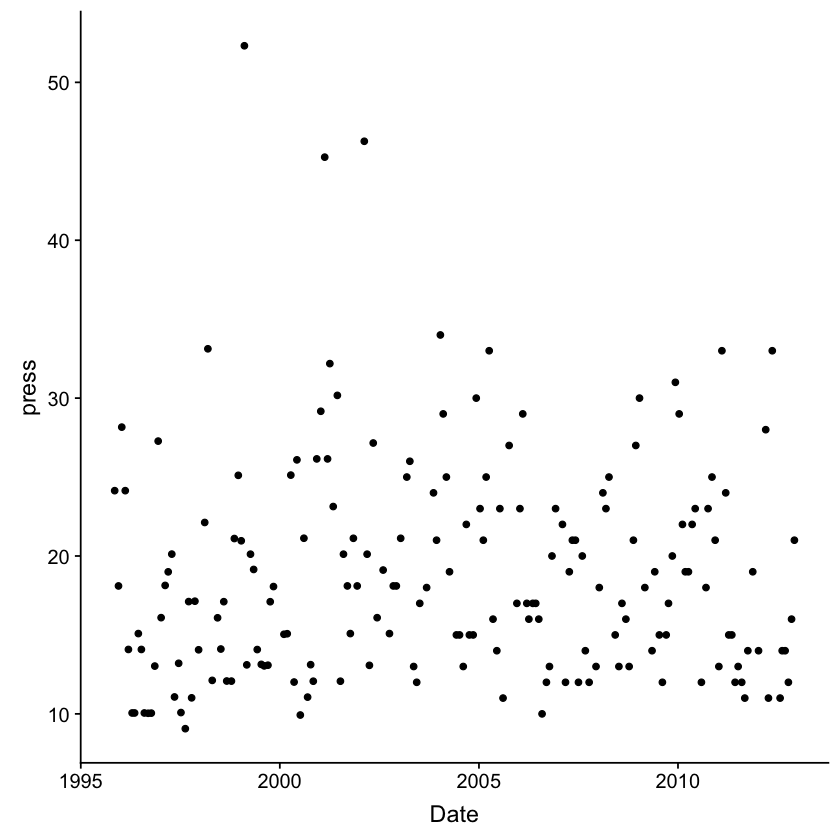

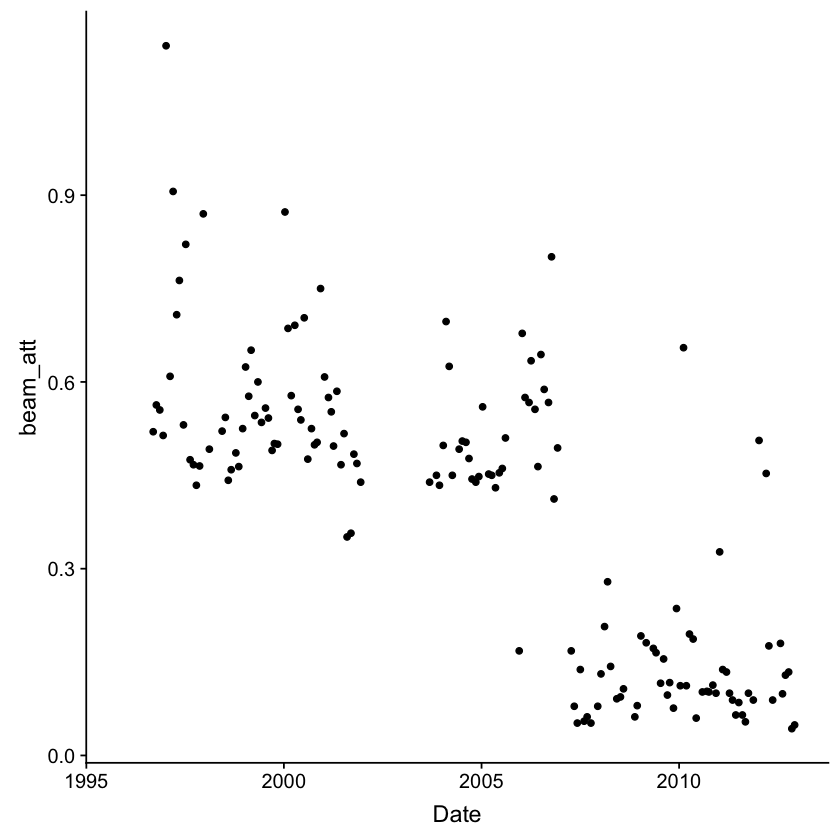

In [36]:
ggplot() + geom_point(data=niskin_at_mld_filtered, aes(x=Date,y=press))
ggplot() + geom_point(data=niskin_at_mld_filtered, aes(x=Date,y=beam_att))